# **PyCoTools Tutorial** 

This tutorial provides information on how to simulate a copasi model, set up and run parameter estimation and calculate profile likelihoods using COPASI. The Kholodenko2000 model is used as a show case model. 

# **Installation**


From a command line or terminal with administrative privalleges, use:
        > pip install PyCoTools

## A Note on Directories and File Paths

Since the input to most of the classes in the `pycopi` module are strings containing the path to a copasi file and a user  often requires custom output filenames (rather than the defaults) its common to have a several file paths to manage at any one time. One way to deal with this is to set up a new folder containing the .cps file of interest and make any python files within this folder available with the python `import` command by creating an (empty) `__init__.py` file. Then create a python module called `FilePaths.py` containing a class containing the relevant paths as attributes. This is useful as need only be created once and all in the same place.  

In [2]:
#FilePaths.py
class KholodenkoExample():
    def __init__(self):
        ## path to folder containing kholodenko example
        if sys.platform=='win32':
            self.current_directory='D:\MPhil\Python\My_Python_Modules\Modelling_Tools\PyCoTools\PyCoTools\Examples\KholodenkoExample'
        else:
            self.current_directory=r'/sharedlustre/users/b3053674/2017/Jan/Kholod/KholodenkoExample'
        ## Kholodenko filename
        self.copasi_filename=r'Kholodenko.cps'
        ## full path to kholodenko model
        self.kholodenko_model=os.path.join(self.current_directory,self.copasi_filename)
        ## full path to the time course output
        self.timecourse_report=os.path.join(self.current_directory,'KholodenkoTimeCourseOutput.txt')
        ## full path to the noisy time course output
        self.noisy_timecourse_report=os.path.join(self.current_directory,'NoisyKholodenkoTimeCourseOutput.txt')
        ## Full path to parameter estimation results file
        self.PEData_file=os.path.join(self.current_directory,'PEResultsFile.txt')
        ## Full path to a folder containing all data from initial multiple global parameter estimations
        self.PEData_dir=os.path.join(self.current_directory,'PEResults')
        ## Full path to file containing secondary local parameter estimation (starting with best values from self.PEData_dir)
#        self.local_PEData_file=os.path.join(self.current_directory,'LocalPEData.txt')
        self.local_PEData_dir=os.path.join(self.current_directory,'LocalPEDataResults')

# Run a Time Course 

From the directory containing FilePaths.py

In [30]:
import PyCoTools
from FilePaths import KholodenkoExample
## allow plotting in this document
%matplotlib inline  
## instantiate instance of KholodenoExample to manage directories 
K=KholodenkoExample()

To run deterministic time course with kholodenko model and:
    1. Collect resulting data as tab separated file (Note that the following equation must hold `Intervals*StepSize=End`)

In [31]:
PyCoTools.pycopi.TimeCourse(K.kholodenko_model,
                        ReportName=K.timecourse_report,
                        End=1000,    
                        Intervals=50,
                        StepSize=20)

    2. Plot and save results in the same directory as the model file

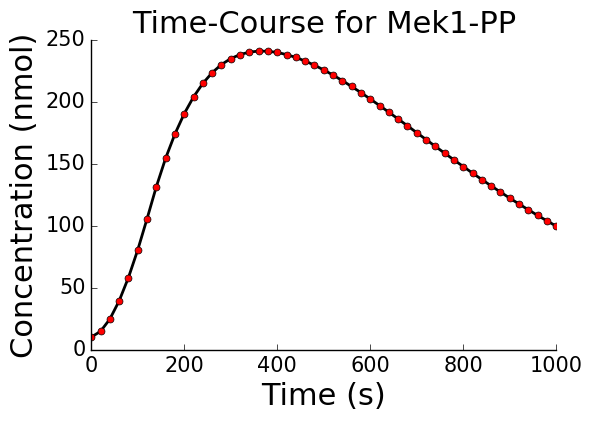

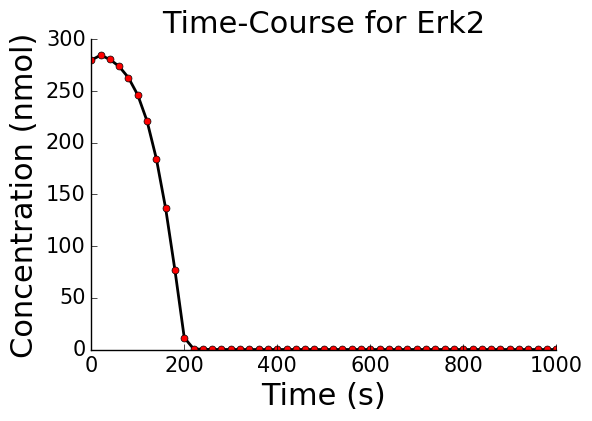

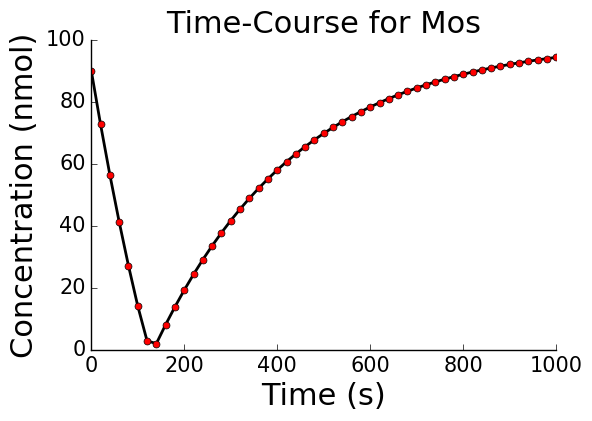

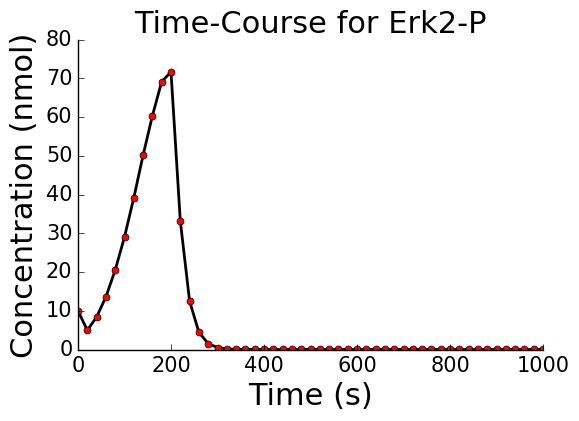

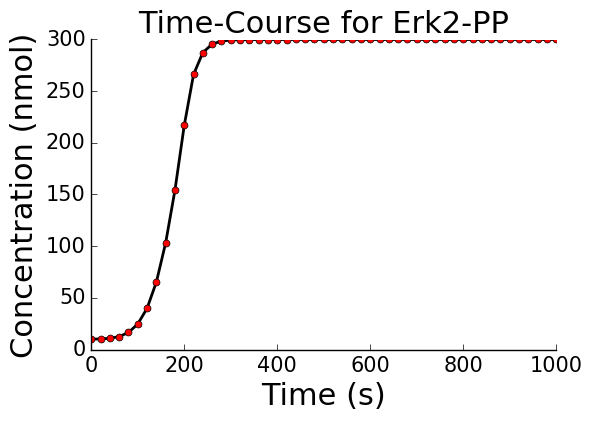

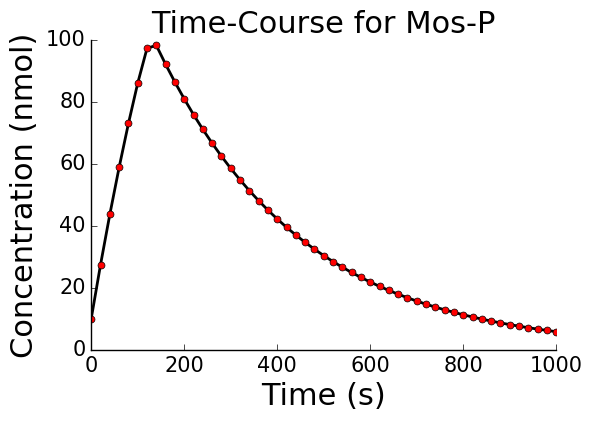

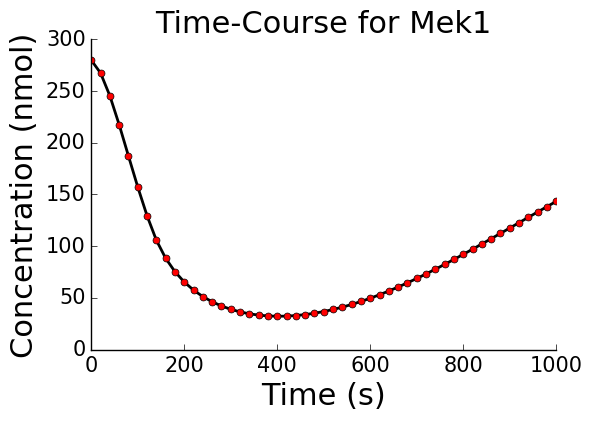

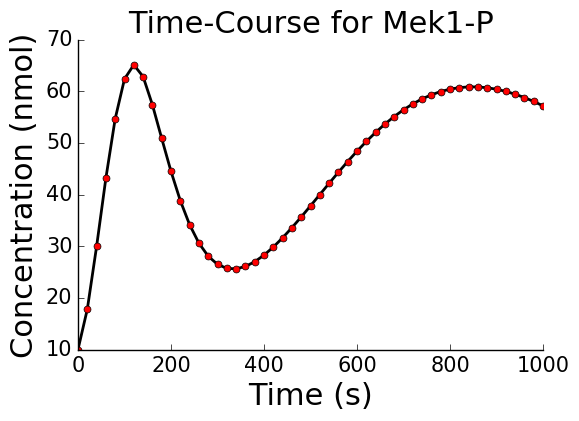

In [32]:
PyCoTools.pycopi.TimeCourse(K.kholodenko_model,
                            ReportName=K.timecourse_report,
                            End=1000,
                            Intervals=50,
                            StepSize=20,
                            Plot='true',
                            SaveFig='true')

    3. Collect results only for selected model variables:

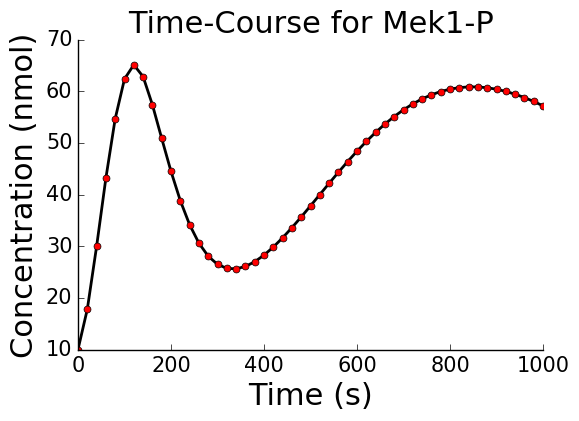

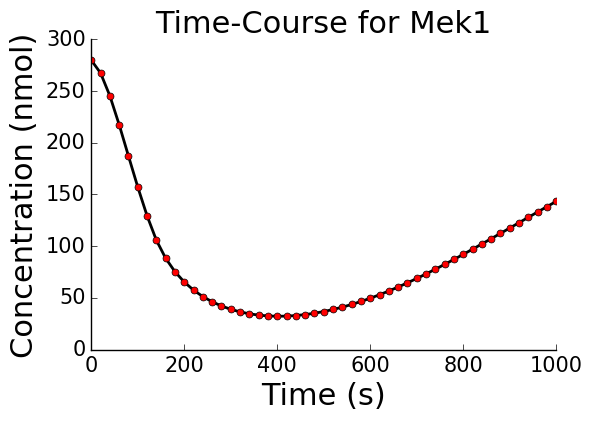

In [34]:
PyCoTools.pycopi.TimeCourse(K.kholodenko_model,
                            ReportName=K.timecourse_report,
                            End=1000,
                            Intervals=50,
                            StepSize=20,
                            Plot='true',
                            SaveFig='true',
                            Metabolites=['Mek1-P','Mek1'])

    3. Play around with graph graphics. Note that because these arguments are just passed on to matplotlib classes, more documenation can be found [here](http://matplotlib.org/)
   

In [39]:
PyCoTools.pycopi.TimeCourse(K.kholodenko_model,
                            ReportName=K.timecourse_report,
                            End=1000,
                            Intervals=50,
                            StepSize=20,
                            Plot='true',
                            SaveFig='true',
                            Metabolites=['Mek1-P','Mek1'],
                            LineWidth=8,
                            MarkerSize=15,
                            MarkerColor='b',
                            AxisSize=20,
                            FontSize=25,
                           )

AssertionError: MarkerColor is not a keyword argument for TimeCourse